Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Memanggil Dataset

In [3]:
df = pd.read_csv("WineQT.csv")

Deskripsi Dataset

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Mencari Heatmap

<Axes: >

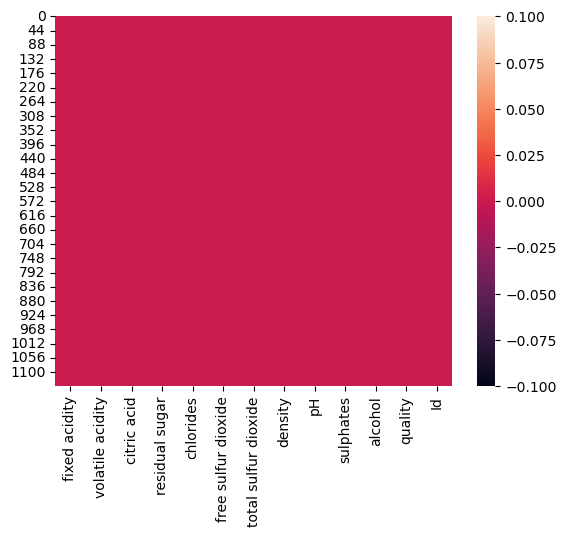

In [6]:
sns.heatmap(df.isnull())

Melihat Nilai Data

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Visualisasi Data

<Axes: >

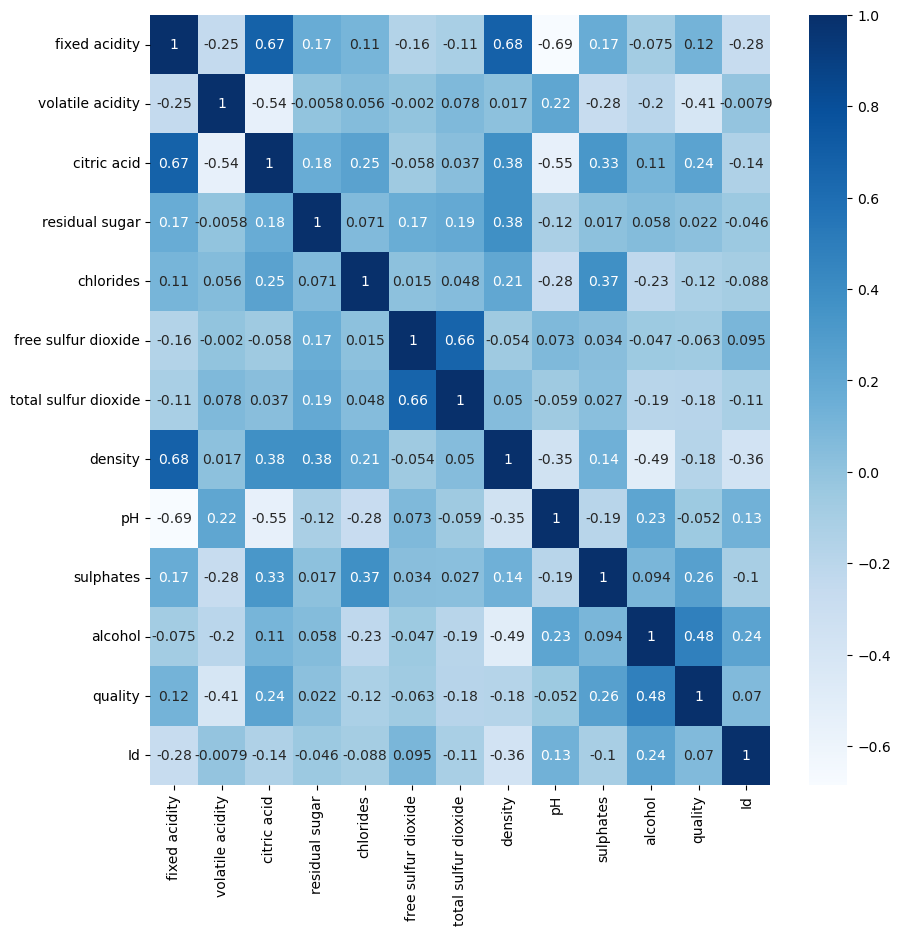

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Data Processing<br>

In [35]:
x=df.drop("quality",axis=1)

label binarization

In [46]:
y= df['quality'].apply(lambda y_values :1 if y_values>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [38]:
y.unique()

array([0, 1], dtype=int64)

Split Data Training Testing

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
y_test.shape

(229,)

Membuat Regresi

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(x_test)

Evaluation Data

In [93]:
y = lr.score(x_test, y_test)
print('Akurasi Model Regresi Linier:', y)

Akurasi Model Regresi Linier: 0.274325030946562


Membuat Inputan Regresi Linier

In [95]:
#residual sugar = 1.9 , pH = 3.51 , alcohol = 9,4 , chlorides = 0.076 , sulphates = 0.56 , fixed acidity = 7.4 , volatile acidity = 0.70 , citric acid = 0.00 , free sulfur dioxide = 11.0 , total sulfur dioxide = 34.0 , density = 0.9978
inputan = np.array([[1.9, 3.51, 9.4, 0.76, 0.56, 7.4, 0.70, 0.00, 11.0, 34.0, 0.9978]])
prediksi = lr.predict(inputan)
print('Alchohol Quality :', prediksi)

Alchohol Quality : [42.68286849]


c:\Users\L e n o v o\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Deployment

Save Model

In [98]:
import pickle
filename = 'Estimasi_Wine_Quality.sav'
pickle.dump(lr,open(filename,'wb'))